In [ ]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
IMAGE_SIZE = [224, 224]
train_path = '/content/gdrive/MyDrive/FIRE-SMOKE-DATASET/Train/'
test_path = '/content/gdrive/MyDrive/FIRE-SMOKE-DATASET/Test/'

Working with 900 images.
Example Smoke Images: 
image_377.jpg


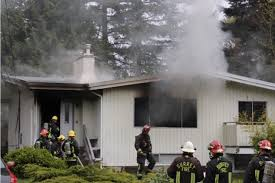

image_13.jpg


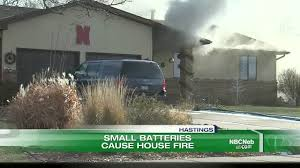

image_4.jpg


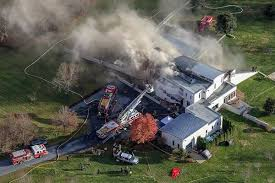

image_311.jpg


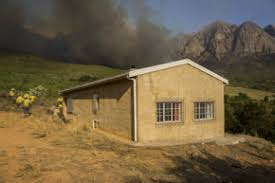

image_403.jpg


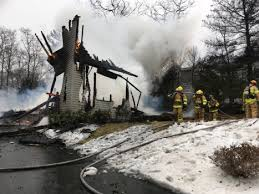

In [ ]:
import os
from PIL import Image
from IPython.display import display
from IPython.display import Image as _imgdis

folder_smoke = train_path + 'Smoke/'

smoke_images = [f for f in os.listdir(folder_smoke) if os.path.isfile(os.path.join(folder_smoke, f))]
print('Working with {0} images.'.format(len(smoke_images)))
print('Example Smoke Images: ')

for i in range(5):
    print(smoke_images[i])
    display(_imgdis(filename=folder_smoke + '/' + smoke_images[i], width=320, height=240))

In [ ]:
vgg_network = VGG19(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg_network.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/gdrive/MyDrive/FIRE-SMOKE-DATASET/Train/*')
print(len(folders))

3


In [ ]:
x = Flatten()(vgg_network.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg_network.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_dataset = data_generator.flow_from_directory(train_path,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

test_dataset = data_generator.flow_from_directory(test_path,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='vgg_net.h5', verbose=1, save_best_only=False)
callbacks = [checkpoint]

start = datetime.now()

model_history = model.fit_generator(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    # steps_per_epoch=5,
    # validation_steps=32,
    callbacks=callbacks,
    verbose=1)

duration = datetime.now() - start
print('Training completed in time: ', duration)

Epoch 1/10
85/85 [==============================] - 44s 517ms/step - loss: 2.7085 - accuracy: 0.9259 - val_loss: 7.3921 - val_accuracy: 0.8433

Epoch 00001: saving model to vgg_net.h5
Epoch 2/10
85/85 [==============================] - 43s 504ms/step - loss: 2.2388 - accuracy: 0.9363 - val_loss: 6.6355 - val_accuracy: 0.8800

Epoch 00002: saving model to vgg_net.h5
Epoch 3/10
85/85 [==============================] - 42s 494ms/step - loss: 2.3770 - accuracy: 0.9381 - val_loss: 4.9363 - val_accuracy: 0.8867

Epoch 00003: saving model to vgg_net.h5
Epoch 4/10
85/85 [==============================] - 42s 495ms/step - loss: 2.4020 - accuracy: 0.9341 - val_loss: 8.3434 - val_accuracy: 0.8500

Epoch 00004: saving model to vgg_net.h5
Epoch 5/10
85/85 [==============================] - 42s 495ms/step - loss: 2.3074 - accuracy: 0.9385 - val_loss: 6.7886 - val_accuracy: 0.8667

Epoch 00005: saving model to vgg_net.h5
Epoch 6/10
85/85 [==============================] - 42s 498ms/step - loss: 2.334

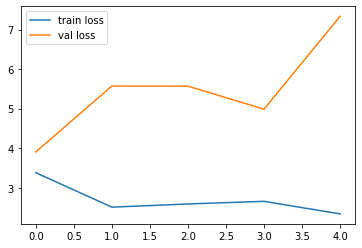

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

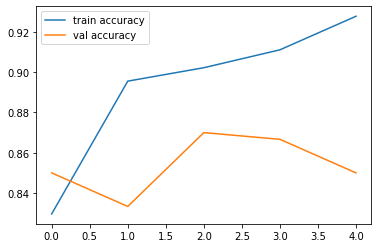

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')